In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn 
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

In [2]:
data = pd.read_csv("./data/X_train.csv")
data = data.dropna()

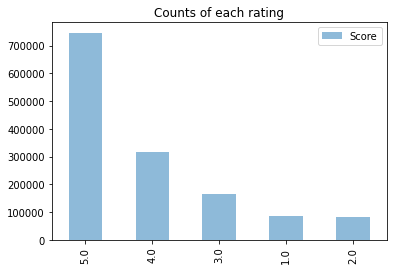

In [4]:
data['Score'].value_counts().plot(kind='bar', legend=True, alpha=.5)
plt.title("Counts of each rating")
plt.show()

In [5]:
# code from https://www.kaggle.com/rcushen/topic-modelling-with-lsa-and-lda
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample
    '''
    vectorized_headlines = count_vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_headlines, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    word_vectors = np.zeros((n_top_words, vectorized_headlines.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1
    words = [word[0].encode('ascii').decode('utf-8') for 
                word in count_vectorizer.inverse_transform(word_vectors)]
    return (words, word_values[0,:n_top_words].tolist()[0])

['like', 'just', 'bad', 'time', 'good', 'don', 'really', 'people', 'story', 'make', 'did', 'watch', 'way', 'know', 'better', 'quot', 'acting', 'think', 'plot', 'great']


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator


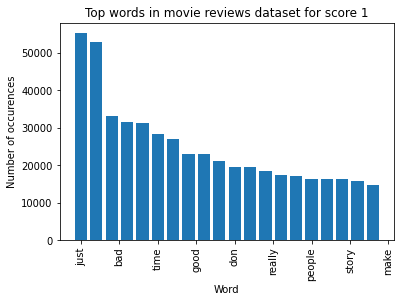

['like', 'just', 'good', 'really', 'story', 'time', 'don', 'bad', 'better', 'make', 'way', 'did', 'people', 'great', 'plot', 'quot', 'know', 'think', 'little', 'does']


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator


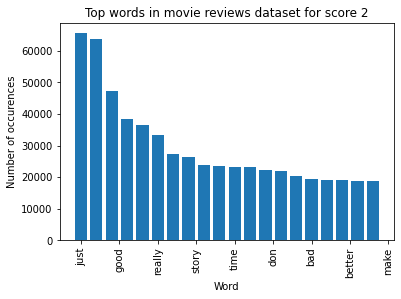

['like', 'good', 'just', 'story', 'really', 'time', 'great', 'don', 'better', 'way', 'little', 'did', 'bad', 'does', 'make', 'think', 'watch', 'people', 'quot', 'films']


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator


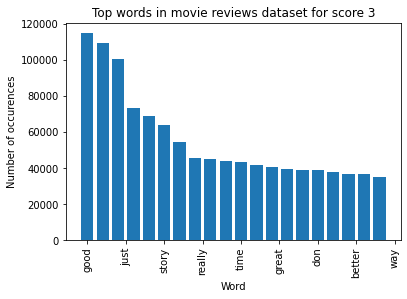

['good', 'like', 'just', 'great', 'story', 'time', 'really', 'way', 'little', 'quot', 'love', 'don', 'people', 'best', 'does', 'watch', 'life', 'series', 'films', 'make']


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator


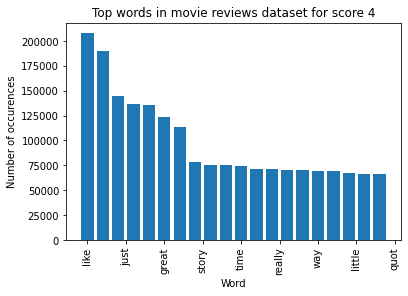

['great', 'like', 'good', 'just', 'time', 'love', 'story', 'really', 'best', 'series', 'watch', 'quot', 'life', 'people', 'way', 'season', 'don', 'seen', 'films', 'new']


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator


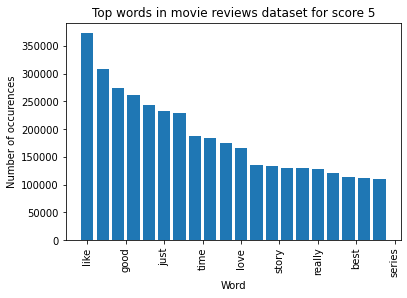

In [16]:
toocommonwords = ['film','movie','movies','character','characters','dvd',]
stop_words = sklearn.feature_extraction.text.ENGLISH_STOP_WORDS.union(toocommonwords)
count_vectorizer = CountVectorizer(stop_words=stop_words)

for i in range(1, 6):
    
    thisdata = data[data["Score"] == float(i)]

    words, word_values = get_top_n_words(n_top_words=20,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=thisdata.Text)
    print(words)

    fig, ax = plt.subplots()
    ax.bar(range(len(words)), word_values);
    ax.set_xticklabels(words, rotation='vertical');
    ax.set_title('Top words in movie reviews dataset for score ' + str(i) );
    ax.set_xlabel('Word');
    ax.set_ylabel('Number of occurences');
    plt.show()

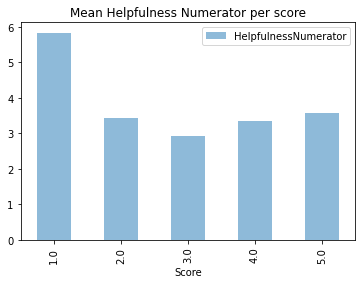

In [18]:
data[["Score","HelpfulnessNumerator"]].groupby("Score").mean().plot(kind='bar',legend=True,alpha=0.5)
plt.title("Mean Helpfulness Numerator per score")
plt.show()